In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset.

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv'
data = pd.read_csv(url)

In [3]:
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


##### In this dataset our target variable is Rings, which is in from of continous data.
##### Also we have one independant variable Sex, this column content catagorical data.

## Exploratory Data Analysis(EDA)

In [11]:
### Checking size of our dataset.
data.shape

(4177, 9)

##### So we have 9 columns and 4177 rows.

In [10]:
### Checking for  null value.
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

##### There are no null values persent in our dataset.

In [12]:
### information about dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


##### In our dataset Sex column content object Dtype data.
##### And Rings column content integer Dtype data. Rest all the columns have Float type data.

In [28]:
### Let's check count of Male and Female.
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

##### This Sex column content 3 classes M = Male, F = Female, I = Infant 

In [13]:
### Let's check descriptive statistics
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


##### The count of each columns in our dataset is equal which means no data lost.
##### The difference between mean and std is looking fine for all variables.
##### In Column height we can see min value is 0 which is acceptable.
##### All the 3 Quartiles difference is looking fine for all the columns accept height, the differnce between Q3 and max is little bit more as compare to other Quartiles differnce.

### Univariate Analysis

([<matplotlib.patches.Wedge at 0x2a06c8ff880>,
 [Text(0.45010440780275796, 1.0036961801643607, 'Male'),
  Text(-1.0848393519507589, -0.18199884741134378, 'Infant'),
  Text(0.6099659291018239, -0.9153914820091724, 'Female')],
 [Text(0.24551149516514065, 0.5474706437260148, '36.6'),
  Text(-0.5917305556095048, -0.09927209858800569, '32.1'),
  Text(0.3327086886009948, -0.49930444473227575, '31.3')])

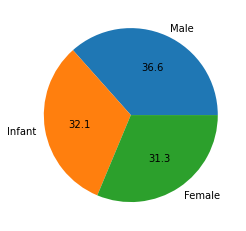

In [41]:
### Let's check Male, Infant, Female in our data set.
plt.pie(data['Sex'].value_counts(),labels=['Male','Infant','Female'],autopct='%.1f')

##### We can see there is no Class Imbalance problem we have.

Text(0, 0.5, 'Rings count')

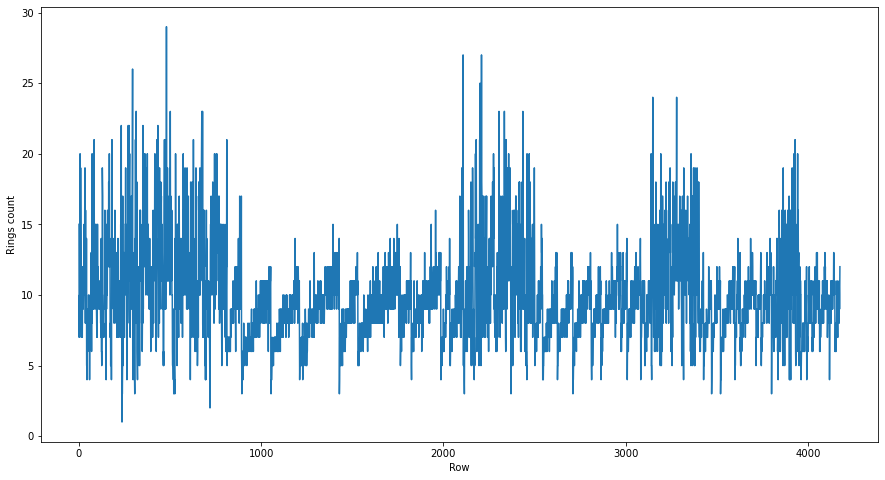

In [69]:
### Checking data for 
plt.figure(figsize=(15,8))
data.Rings.plot(kind = 'line')
plt.xlabel('Row')
plt.ylabel('Rings count')

##### Max value for rings is around 30 and min value for rings is about 1.

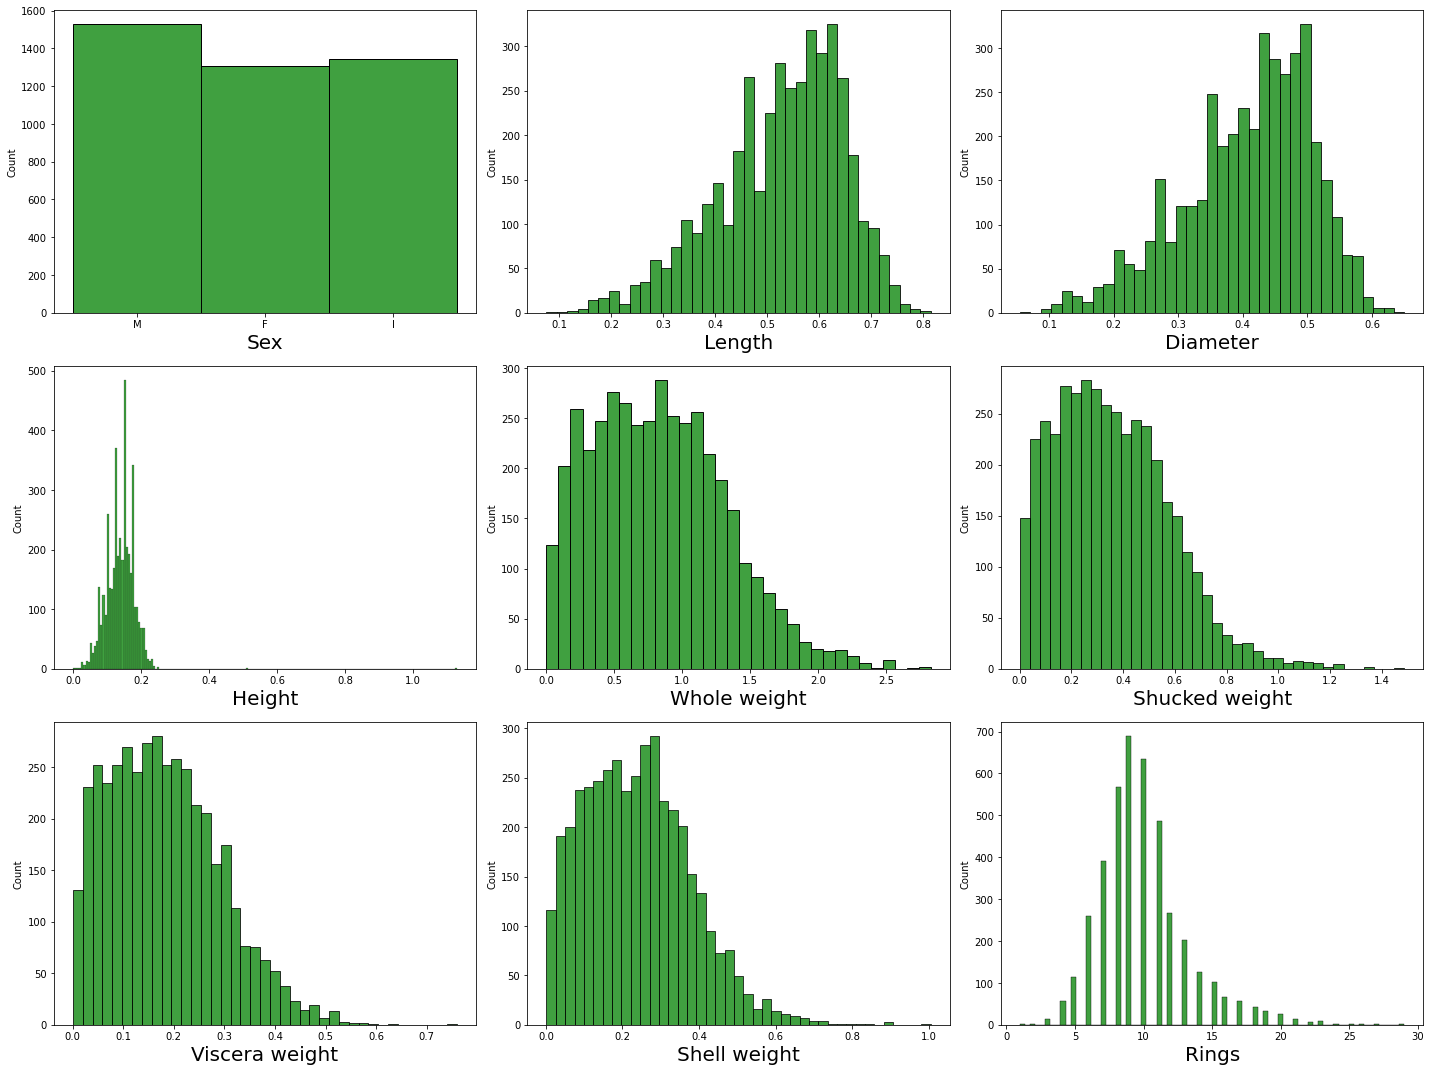

In [88]:
### Checking data distribution for each columns.
plt.figure(figsize=(20,15),facecolor='white')
count = 1
for column in data:
    if count <=9:
        ax = plt.subplot(3,3,count)
        sns.histplot(data[column], color='g')
        plt.xlabel(column,fontsize = 20)
    count+=1
plt.tight_layout()

##### We can see that data distribution in each continous columns is little skewed. We will look into it.
##### The data distribution in length and Diameter column is slightly left skewed.

In [30]:
cols = [ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

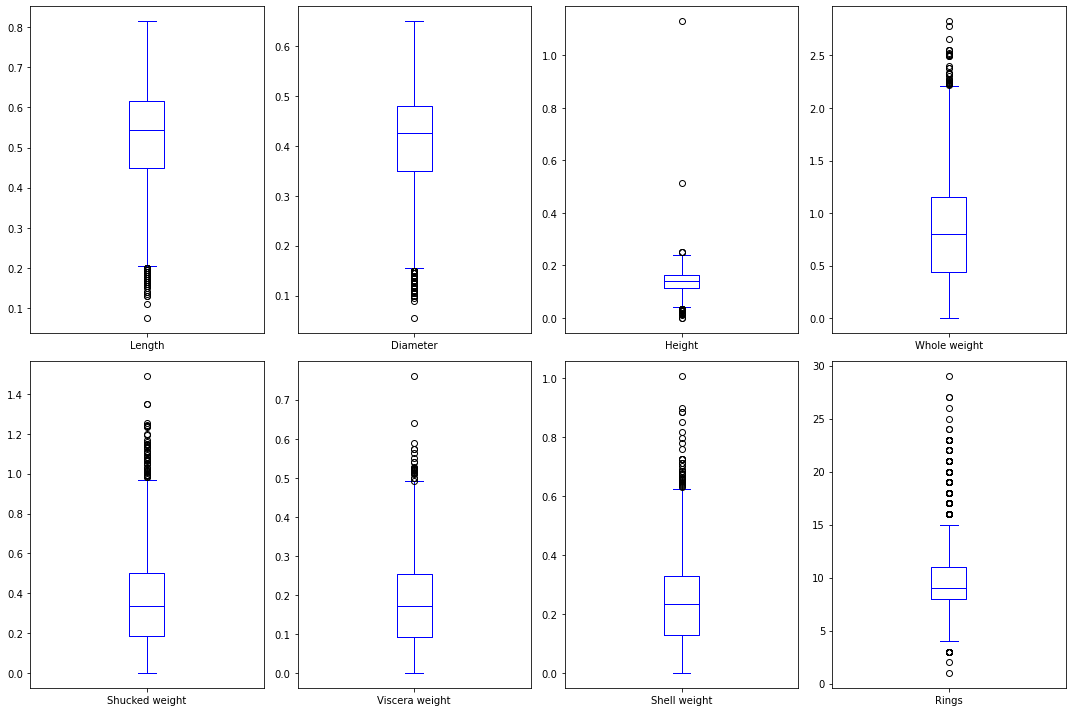

In [49]:
### Let's plot Boxplot to check outliers in our dataset.
plt.figure(figsize= (15,10))
count =1
for x in cols:
    if count <=8:
        ax = plt.subplot(2,4,count)
        data[x].plot(kind = 'box',color ='b')
    count +=1
plt.tight_layout()

##### There is outliers present in All the columns. We haven't checked outliers in Sex columns because it content catogorical data.

### Bivariate Analysis

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

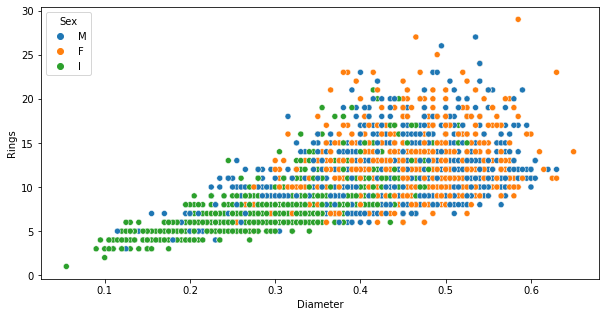

In [54]:
### Let's check relationship between Rings and Diameter.
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Diameter',y = 'Rings',data=data,hue='Sex')

##### We can see there is linear relationship between Diameter and Rings.
##### Also can see Female's Abalone have more rings as diameter increases as compare to male and Infant.
##### Inflant Abalone usually have diameter between 0.01 to 0.4

<AxesSubplot:xlabel='Length', ylabel='Rings'>

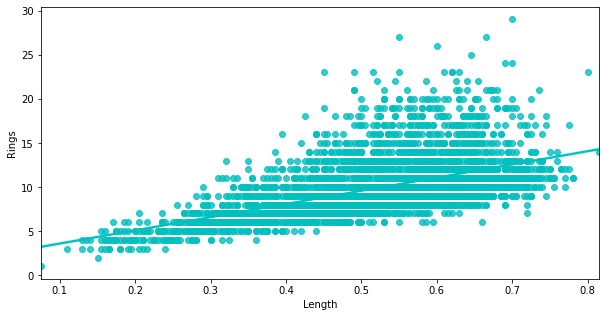

In [65]:
### Ploting regression plot to check relationship between Rings and Length.
plt.figure(figsize=(10,5))
sns.regplot(x = 'Length',y = 'Rings',data=data, color='c')

##### Above plot shows linear relationship between  Rings and Length of Abalone.

<AxesSubplot:xlabel='Sex', ylabel='Height'>

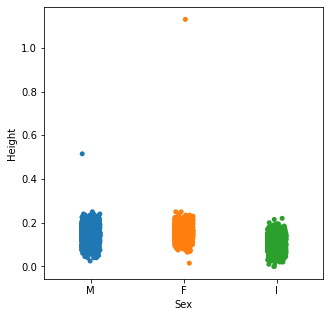

In [78]:
### Lets check Height and Sex relationship.
plt.figure(figsize=(5,5))
sns.stripplot(x = 'Sex',y = 'Height',data= data)

##### There is very minimum difference between Male and Female Abalone, But we can say the height for infant start from 0.001 whereas male and female start from 0.7 or 0.8

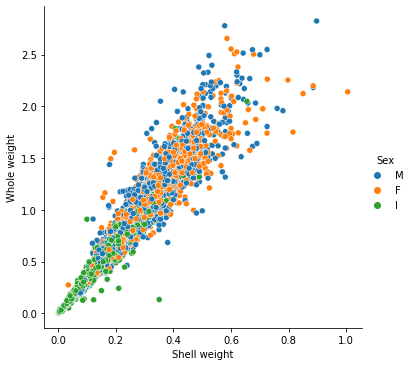

In [79]:
### Checking relationship between Whole weight and Shell weight
sns.relplot(x = 'Shell weight', y = 'Whole weight',data=data,hue='Sex')

#### We can see there is strong relationship between Whole weight and Shell Weight.

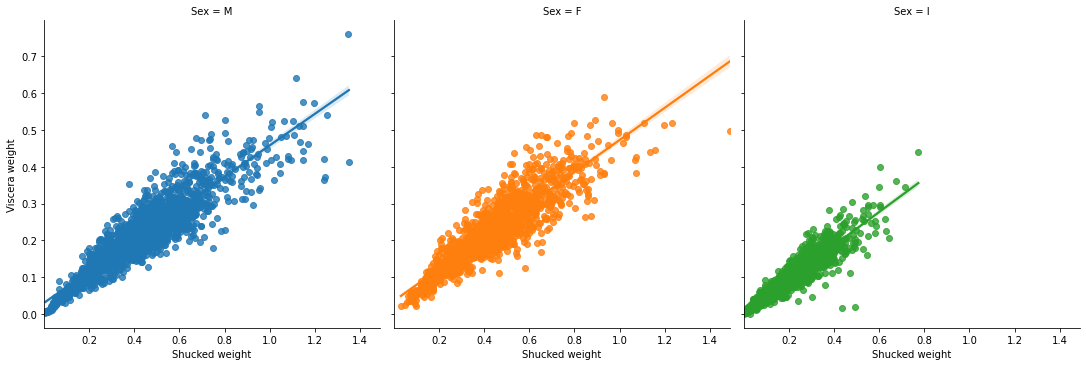

In [81]:
### Let's check relationship between Shucked weight and Viscera weight.
sns.lmplot(x = 'Shucked weight', y = 'Viscera weight',data=data,hue='Sex', col='Sex')

##### We can say as the Shucked weight increases Viscera weight also increases or Vice-versa, Also Male Abalone has more weight then Female and Inflant.

## Multivariate Analysis

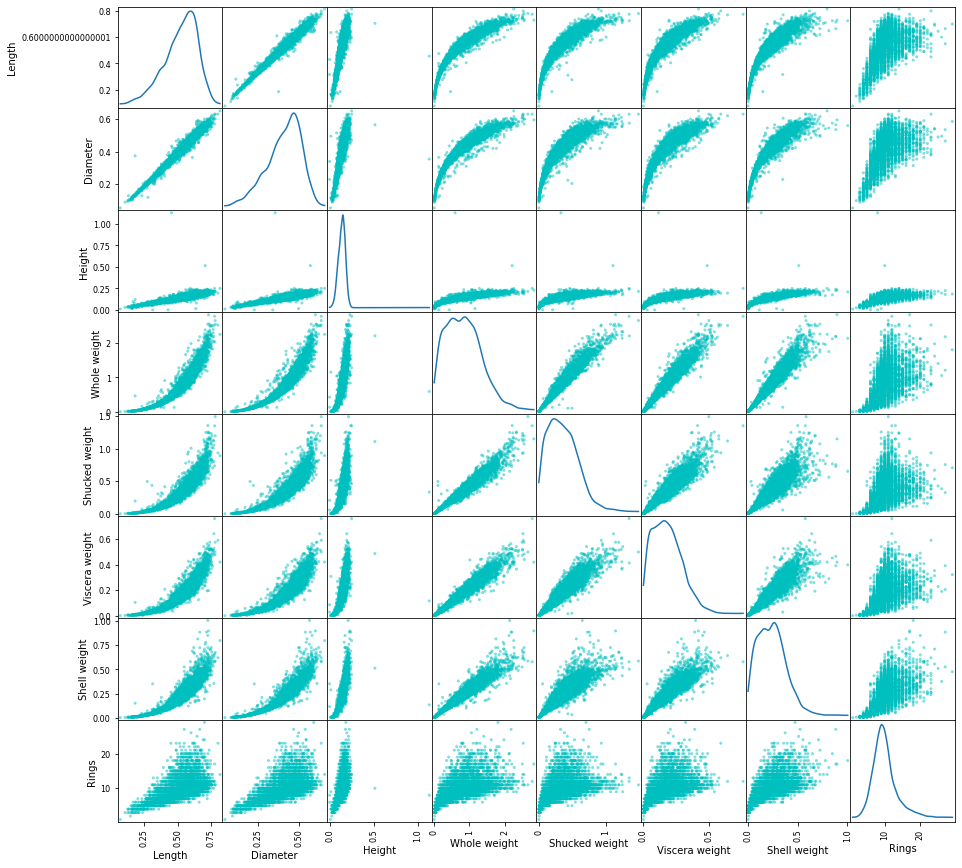

In [89]:
from pandas.plotting import scatter_matrix
# Kde = Kernel density estimation (its kind of a graph)
scatter_matrix(data, figsize=(15,15),diagonal = 'kde',color ='c')
plt.show()

##### WE can see all the features shows linear relationship with our label.

<AxesSubplot:>

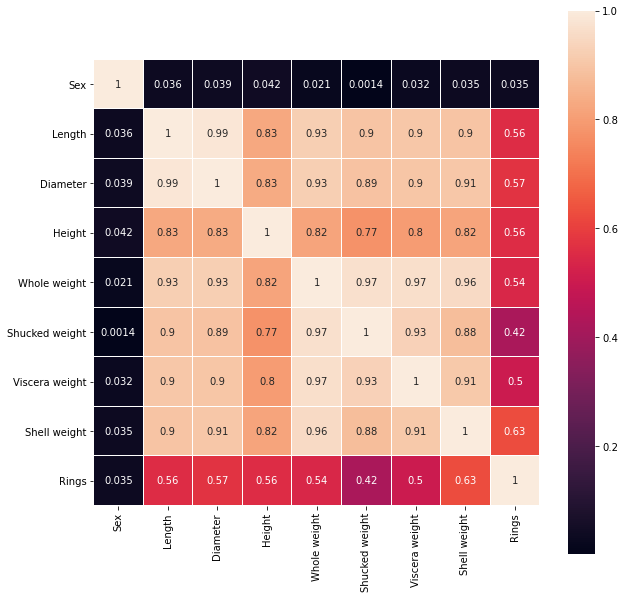

In [168]:
### Let's plot heatmap to check correlation between Features and label.
data_corr = data.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(data_corr,square=True, annot=True, linewidths=0.1)

##### We can Length have strong correlation with all the features. and also Whole weight shows strong relationship with Shucked weight and Viscera weight.
##### Whole weight and Shell weight are also highly correlated  to each other.

## Pre-Processing

In [96]:
### Let's convert Sex features into Intigers.
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
sex = lb.fit_transform(data['Sex'])

In [97]:
data['Sex'] = sex
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##### we have converted Sex column to intiger wehere  2 = Male, 0 = Female, and 1 = Infant

In [118]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

##### Sex is our catogorical column leave it. WE can see moderate left skewness in Length and Diameter.
##### Height is contenting highly right skewed data.
##### Rest features content moderate right skewed data.

## Data Cleaning (Removing Skewness and Outliers )

In [98]:
### Let's first deal with Outliers.
from scipy.stats import zscore
z =np.abs(zscore(data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']]))
df = data[(z<3).all(axis = 1)]

In [121]:
print(df.shape,data.shape)

(4027, 9) (4177, 9)


In [122]:
### Let's count data loss after Z_score.
((4177 - 4027)/4177)*100

3.5910940866650707

##### After applying z score we only loose 3.5% data which is acceptable.

In [123]:
#Let's check skewness again for new data frame.
df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

##### Rings is our target variable so we will not apply any transformation technique to remove outliers.
##### We see only moderate left skewness in 2 columns Length and Diameter. we can consider them.

In [176]:
df['Length'] = np.square(df['Length'])
df['Diameter'] = np.square(df['Diameter'])

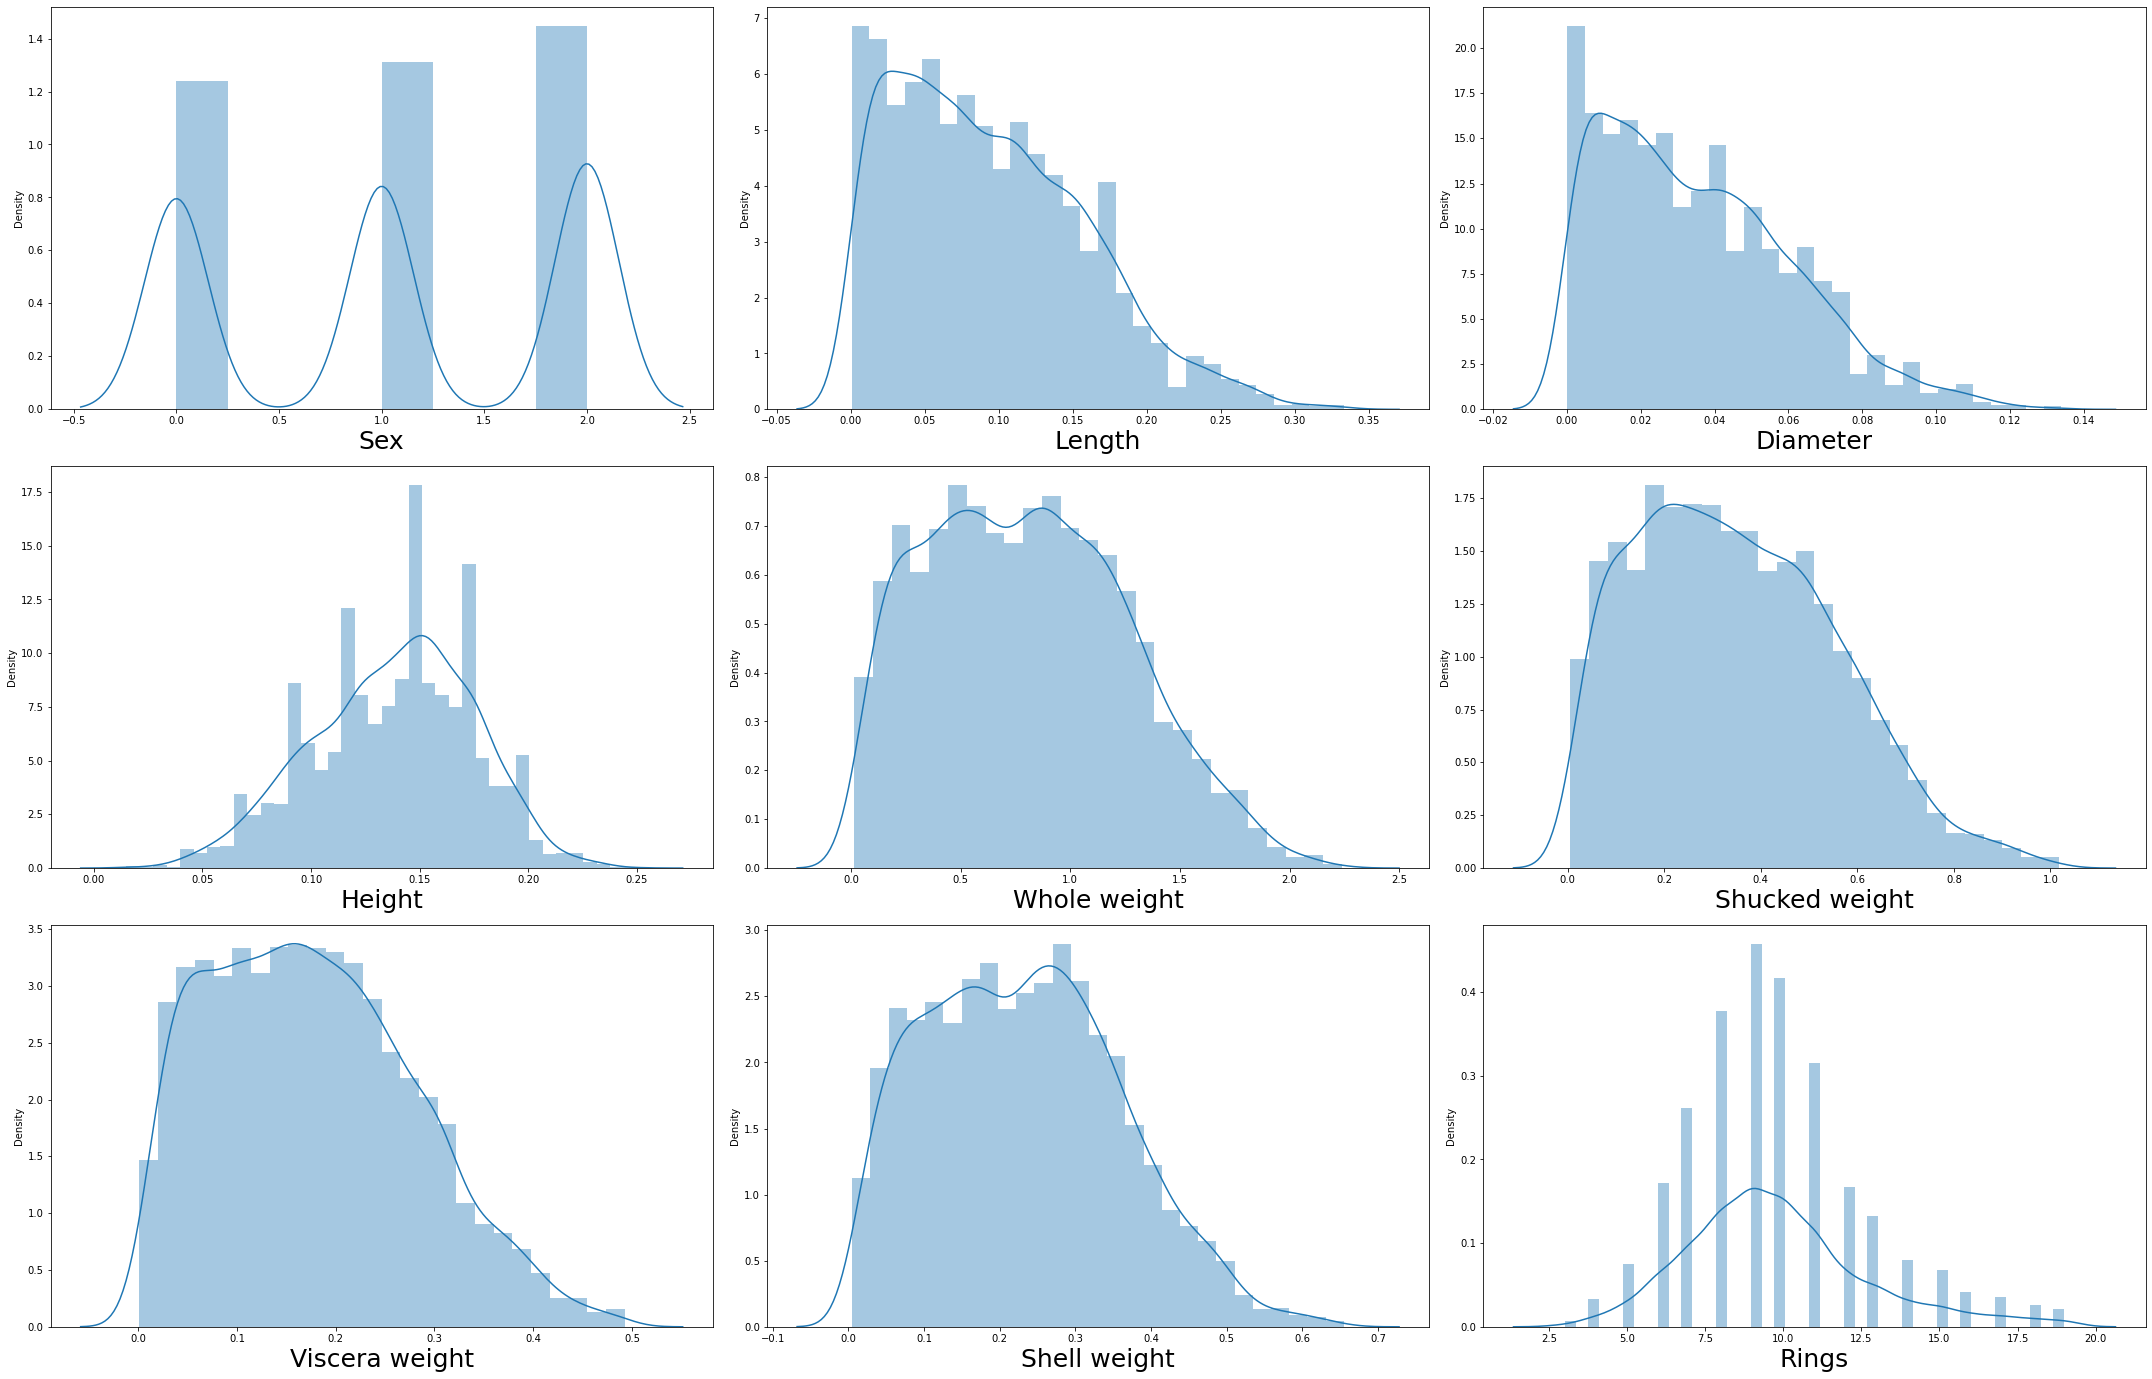

In [238]:
##### Let's check the distribution again.
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

In [239]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.042859,0.017749,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.015006,0.004932,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.078905,0.031117,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.037481,0.017749,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.011859,0.004228,0.080,0.2050,0.0895,0.0395,0.055,7


## Seperating our Features and Label data.

In [430]:
x = df.drop(['Rings'],axis=1)
y = df['Rings']

In [431]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.042859,0.017749,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.015006,0.004932,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.078905,0.031117,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.037481,0.017749,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.011859,0.004228,0.080,0.2050,0.0895,0.0395,0.055


## Standardization

In [432]:
#### Scaling our features data using Standard scaler (Standardization).
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_new = scale.fit_transform(x)

### Using variance_inflation_factor to check multicolinearity problem. 

In [433]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif['features'] = x.columns

In [434]:
vif

,vif,features
0,1.011619,Sex
1,22.818655,Length
2,20.250197,Diameter
3,5.805225,Height
4,109.331293,Whole weight
5,28.857588,Shucked weight
6,17.443064,Viscera weight
7,24.627616,Shell weight


##### The VIF score for Whole Weight is 109.33 which shows its highly colinear with other features.

In [449]:
### Let's remove this features.
x.drop(['Whole weight'],axis=1,inplace=True)

##### Whe have Standardized our Features using StandardScaler to avoid Model Baising.

## Train - Test Split

In [450]:
### Converting data into Train and test for model building.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y, test_size=0.25, random_state=45)

In [451]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3020, 8) (3020,) (1007, 8) (1007,)


## Importing Regression Models

In [452]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

### Instantiating Linear Regression model and fit training data.

In [453]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test) #Pridicting x_test data

### Instantiating KNeighborsRegressor model and fit training data.

In [454]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_kn_pred = knn.predict(x_test) #Pridicting x_test data

### Instantiating DecisionTreeRegressor model and fit training data.

In [455]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr_pred = dtr.predict(x_test) #Pridicting x_test data

### Instantiating RandomForestRegressor model and fit training data.

In [456]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr_pred = rfr.predict(x_test) #Pridicting x_test data

### Instantiating SVR model and fit training data.

In [457]:
svr = SVR()
svr.fit(x_train,y_train)
y_svr_pred = svr.predict(x_test) #Pridicting x_test data

### Instantiating SGDRegressor model and fit training data.

In [458]:
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
y_sgd_pred = sgd.predict(x_test) #Pridicting x_test data

## Checking Evalution Metrics and cross validation for all the models.

In [459]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [460]:
print('R2 score for Linear regression = ',r2_score(y_test,y_lr_pred))
print('R2 score for KNeighborsRegressor = ',r2_score(y_test,y_kn_pred))
print('R2 score for DecisionTreeRegressor = ',r2_score(y_test,y_dtr_pred))
print('R2 score for RandomForestRegressor = ',r2_score(y_test,y_rfr_pred))
print('R2 score for SVR = ',r2_score(y_test,y_svr_pred))
print('R2 score for SGDRegressor = ',r2_score(y_test,y_sgd_pred))

R2 score for Linear regression =  0.5242712434074563
R2 score for KNeighborsRegressor =  0.5028101444523381
R2 score for DecisionTreeRegressor =  0.141297566351531
R2 score for RandomForestRegressor =  0.5600346363986192
R2 score for SVR =  0.5658620375418122
R2 score for SGDRegressor =  0.5185118516804479


In [461]:
print('CV score for Linear regression = ',cross_val_score(lr,x,y,cv=5).mean())
print('CV score for KNeighborsRegressor = ',cross_val_score(knn,x,y,cv=5).mean())
print('CV score for DecisionTreeRegressor = ',cross_val_score(dtr,x,y,cv=5).mean())
print('CV score for RandomForestRegressor = ',cross_val_score(rfr,x,y,cv=5).mean())
print('CV score for SVR = ',cross_val_score(svr,x,y,cv=5).mean())
print('CV score for SGDRegressor = ',cross_val_score(sgd,x,y,cv=5).mean())

CV score for Linear regression =  0.39854472845985134
CV score for KNeighborsRegressor =  0.3919722703447225
CV score for DecisionTreeRegressor =  -0.13987053404766858
CV score for RandomForestRegressor =  0.4314347235758749
CV score for SVR =  0.42499121559818526
CV score for SGDRegressor =  0.3338490898464621


##### From the above R2 score and CV score we can see Random Forest is best model for this problem.

## Let's perform Hyper Parameter tuning.

In [463]:
from sklearn.model_selection import GridSearchCV

In [469]:
params = {'n_estimators': np.arange(100,150,15),
               'max_features': ['auto','sqrt'],
               'max_depth': np.arange(2,10,2),
               'min_samples_split': [5,7,9,11,13],
               'min_samples_leaf': [11,15,17,21]}

In [470]:
print(params)

{'n_estimators': array([100, 115, 130, 145]), 'max_features': ['auto', 'sqrt'], 'max_depth': array([2, 4, 6, 8]), 'min_samples_split': [5, 7, 9, 11, 13], 'min_samples_leaf': [11, 15, 17, 21]}


In [471]:
grid_search = GridSearchCV(estimator=rfr,param_grid= params,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [11, 15, 17, 21],
                         'min_samples_split': [5, 7, 9, 11, 13],
                         'n_estimators': array([100, 115, 130, 145])})

In [472]:
  grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 11,
 'min_samples_split': 7,
 'n_estimators': 115}

In [473]:
rfr = grid_search.best_estimator_

In [474]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=11, min_samples_split=7,
                      n_estimators=115)

In [475]:
y_final_pred = rfr.predict(x_test)

In [476]:
r2_score(y_test,y_final_pred)

0.5891132963546453

In [477]:
cross_val_score(rfr,x_new,y,cv=5).mean()

0.4748054909277218

##### Final model r2 score =  58% and CV score = 47%

## Saving our model

In [478]:
import pickle
Abalone_age = 'Abalone Rings.pickle'
pickle.dump(rfr,open(Abalone_age,'wb'))

In [479]:
loaded_model = pickle.load(open(Abalone_age,'rb'))

In [480]:
y_pred = loaded_model.predict(x_test)

In [481]:
r2_score(y_test,y_pred)

0.5891132963546453